
2. Diga el tipo de cada una de las variables del dataset (cualitativa o categórica, cuantitativa continua,
cuantitativa discreta)
3. Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están
representando.
4. Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.
5. Utilice las variables categóricas, haga tablas de frecuencia, proporción, gráficas de barras o cualquier
otra técnica que le permita explorar los datos.
6. Determine el comportamiento a seguir con los valores faltantes. Explique si necesita remover alguna
variable por la cantidad de valores faltantes que tiene. ¿Es factible eliminar todos los valores
faltantes de todas las variables?
7. Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA,
¿valdrá la pena?
8. Estudie si es conveniente hacer un Análisis de Componentes Principales. Recuerde que puede usar el
índice KMO y el test de esfericidad de Bartlett. Haga un análisis de componentes principales con las
variables numéricas, discuta los resultados e interprete los componentes.
9. Obtenga reglas de asociación interesantes del dataset. Recuerde discretizar las variables numéricas.
Genere reglas con diferentes niveles de confianza y soporte. Discuta los resultados. Si considera que
debe eliminar variables porque son muy frecuentes y con eso puede recibir más insigths de la
generación de reglas. Hágalo y discútalo.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Load the dataset
data_url = "./cervical+cancer+risk+factors/risk_factors_cervical_cancer.csv"  # Replace with the actual file path
df = pd.read_csv(data_url)

# 1 Haga una exploración rápida de sus datos.

In [48]:
# Display basic information about the dataset
print("Dataset Summary:")
print(df.info())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 n

In [49]:
# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since f

In [50]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0

In [51]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV               

In [52]:
# Explore unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for column in df.select_dtypes(include=['object']):
    print(f"{column}: {df[column].unique()}")


Unique Values in Categorical Columns:
Number of sexual partners: ['4.0' '1.0' '5.0' '3.0' '2.0' '6.0' '?' '7.0' '15.0' '8.0' '10.0' '28.0'
 '9.0']
First sexual intercourse: ['15.0' '14.0' '?' '16.0' '21.0' '23.0' '17.0' '26.0' '20.0' '25.0' '18.0'
 '27.0' '19.0' '24.0' '32.0' '13.0' '29.0' '11.0' '12.0' '22.0' '28.0'
 '10.0']
Num of pregnancies: ['1.0' '4.0' '2.0' '6.0' '3.0' '5.0' '?' '8.0' '7.0' '0.0' '11.0' '10.0']
Smokes: ['0.0' '1.0' '?']
Smokes (years): ['0.0' '37.0' '34.0' '1.266972909' '3.0' '12.0' '?' '18.0' '7.0' '19.0'
 '21.0' '15.0' '13.0' '16.0' '8.0' '4.0' '10.0' '22.0' '14.0' '0.5' '11.0'
 '9.0' '2.0' '5.0' '6.0' '1.0' '32.0' '24.0' '28.0' '20.0' '0.16']
Smokes (packs/year): ['0.0' '37.0' '3.4' '2.8' '0.04' '0.5132021277' '2.4' '6.0' '?' '9.0'
 '1.6' '19.0' '21.0' '0.32' '2.6' '0.8' '15.0' '2.0' '5.7' '1.0' '3.3'
 '3.5' '12.0' '0.025' '2.75' '0.2' '1.4' '5.0' '2.1' '0.7' '1.2' '7.5'
 '1.25' '3.0' '0.75' '0.1' '8.0' '2.25' '0.003' '7.0' '0.45' '0.15' '0.05'
 '0.25' '4.8'

# 2. Diga el tipo de cada una de las variables del dataset (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)

# Cualitativas o Categóricas (binarias):
- Smokes
- Hormonal Contraceptives
- IUD
- STDs
- STDs:condylomatosis
- STDs:cervical condylomatosis
- STDs:vaginal condylomatosis
- STDs:vulvo-perineal condylomatosis
- STDs:syphilis
- STDs:pelvic inflammatory disease
- STDs:genital herpes
- STDs:molluscum contagiosum
- STDs:AIDS
- STDs:HIV
- STDs:Hepatitis B
- STDs:HPV

# Cuantitativas Continuas:
- Age
- Smokes (years)
- Smokes (packs/year)
- Hormonal Contraceptives (years)
- IUD (years)
- STDs: Time since first diagnosis
- STDs: Time since last diagnosis
- Cuantitativas Discretas:

# Number of sexual partners
- First sexual intercourse
- Num of pregnancies
- STDs (number)

# 3. Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando.

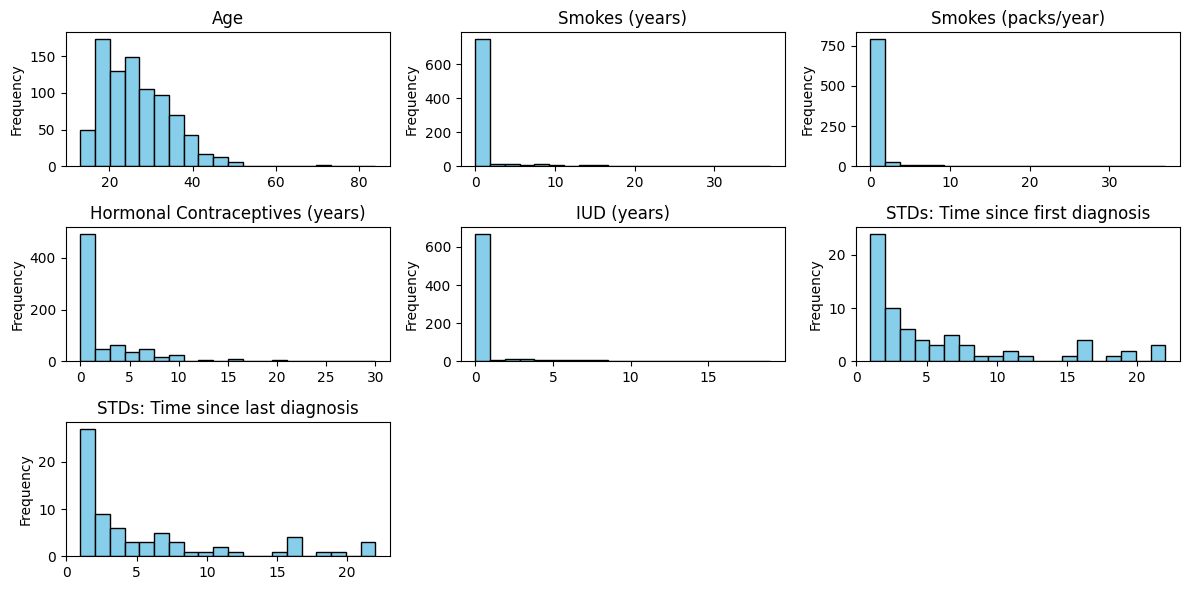

In [53]:
# Cuantitativas Continuas
continuous_vars = ['Age', 'Smokes (years)', 'Smokes (packs/year)',
                   'Hormonal Contraceptives (years)', 'IUD (years)',
                   'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']


for var in continuous_vars:
    df[var] = pd.to_numeric(df[var], errors='coerce')


plt.figure(figsize=(12, 6))
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 3, i + 1)
    df[var].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
    plt.title(var)
plt.tight_layout()
plt.show()


# 4. Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.

Correlation Matrix:
                                       Age  Smokes (years)  \
Age                               1.000000        0.218619   
Smokes (years)                    0.218619        1.000000   
Smokes (packs/year)               0.131946        0.724116   
Hormonal Contraceptives (years)   0.289783        0.050979   
IUD (years)                       0.216101        0.040220   
STDs: Number of diagnosis        -0.001606        0.084647   
STDs: Time since first diagnosis  0.405929        0.159106   
STDs: Time since last diagnosis   0.485121        0.164345   
Dx:Cancer                         0.110340        0.056234   
Dx:CIN                            0.061443       -0.030968   
Dx:HPV                            0.101722        0.058847   
Dx                                0.092635       -0.049926   
Hinselmann                       -0.003967        0.072251   
Schiller                          0.103283        0.095890   
Citology                         -0.016862       -

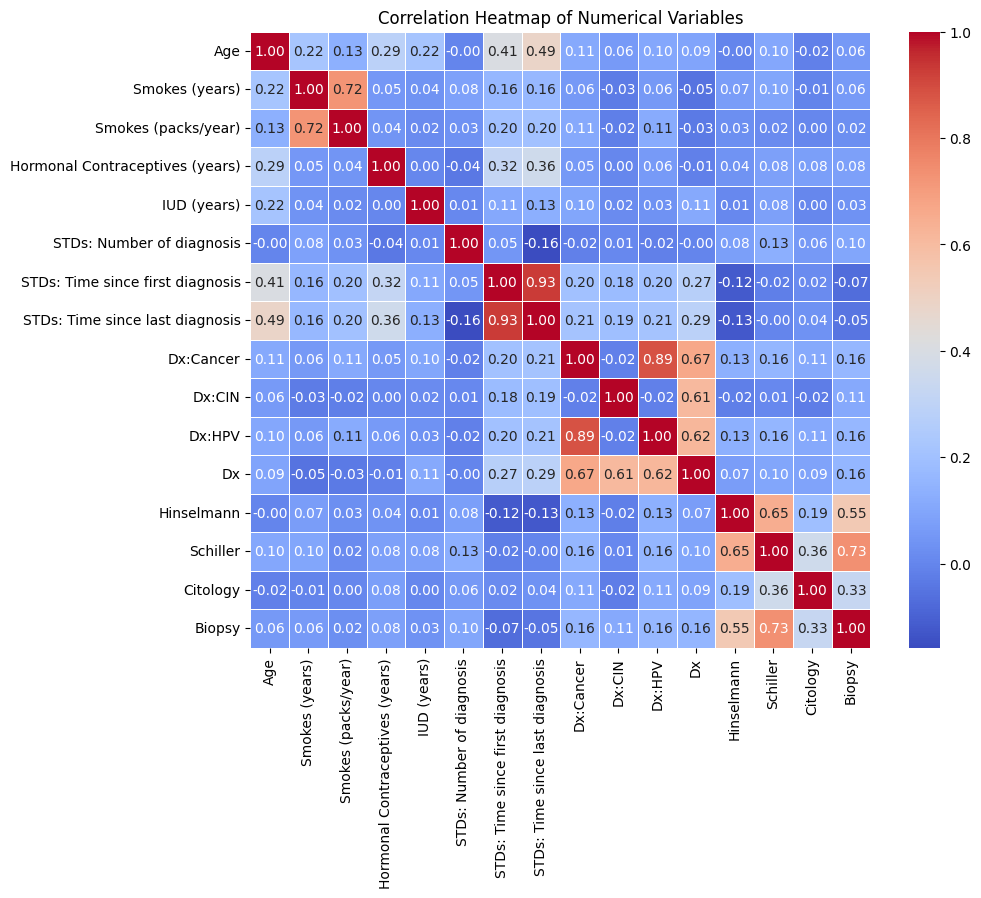

In [54]:
# Isolate numerical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64'])

# Perform correlation analysis
correlation_matrix = numerical_vars.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# 5. Utilice las variables categóricas, haga tablas de frecuencia, proporción, gráficas de barras o cualquier otra técnica que le permita explorar los datos.

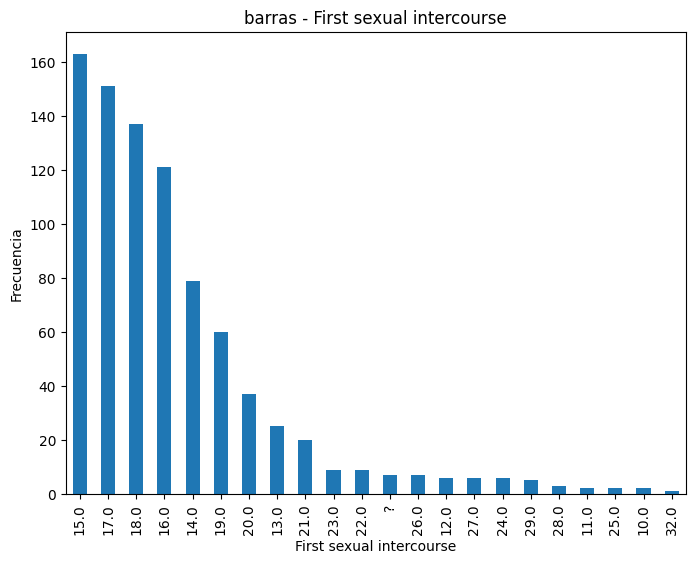

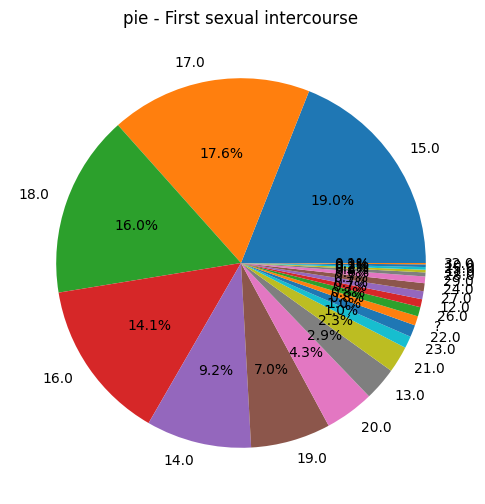

frecuencia - First sexual intercourse:
                          count
First sexual intercourse       
15.0                        163
17.0                        151
18.0                        137
16.0                        121
14.0                         79
19.0                         60
20.0                         37
13.0                         25
21.0                         20
23.0                          9
22.0                          9
?                             7
26.0                          7
12.0                          6
27.0                          6
24.0                          6
29.0                          5
28.0                          3
11.0                          2
25.0                          2
10.0                          2
32.0                          1




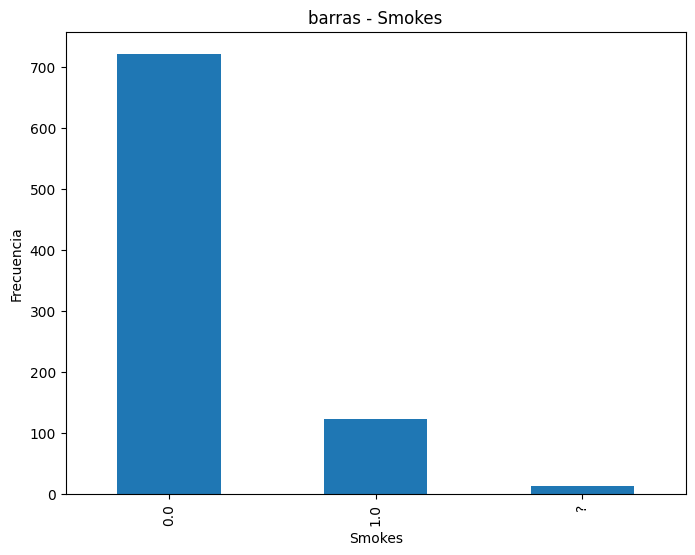

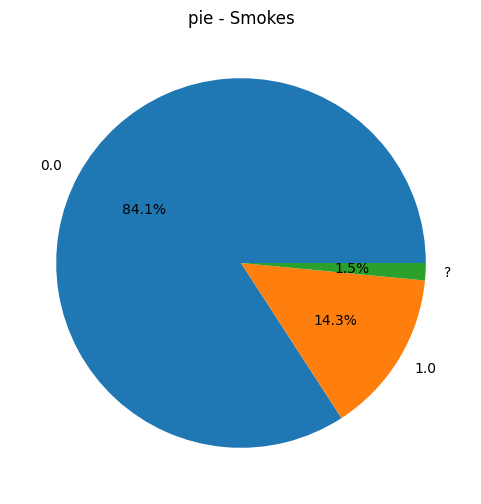

frecuencia - Smokes:
        count
Smokes       
0.0       722
1.0       123
?          13




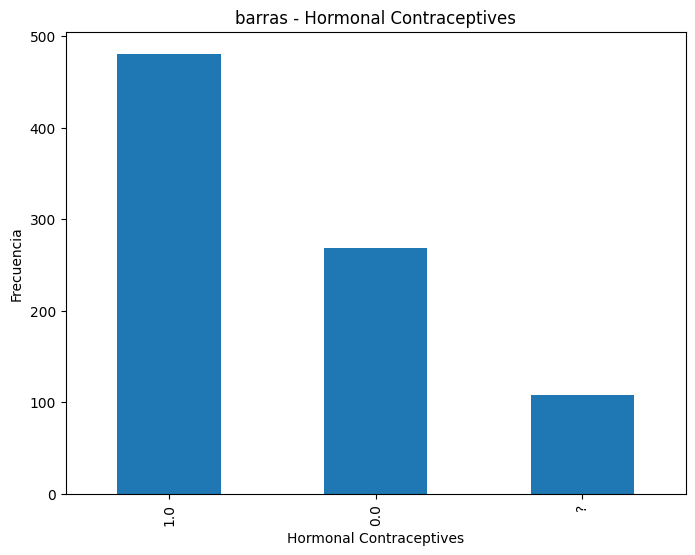

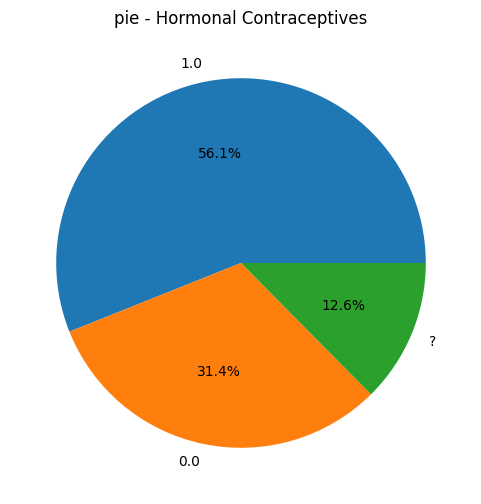

frecuencia - Hormonal Contraceptives:
                         count
Hormonal Contraceptives       
1.0                        481
0.0                        269
?                          108




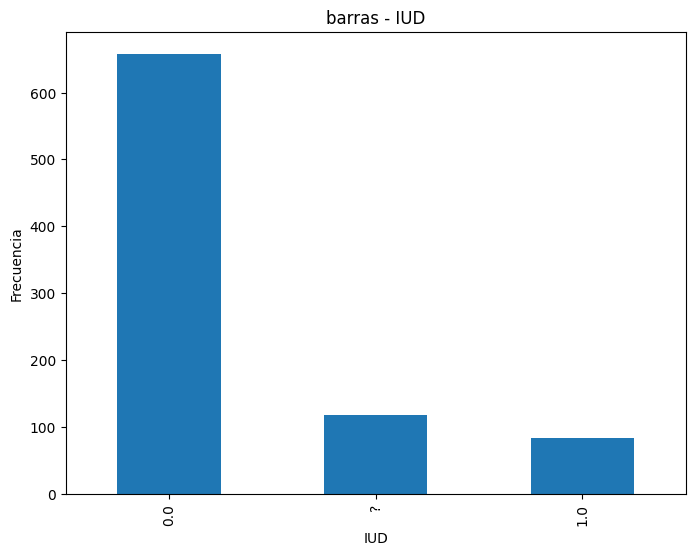

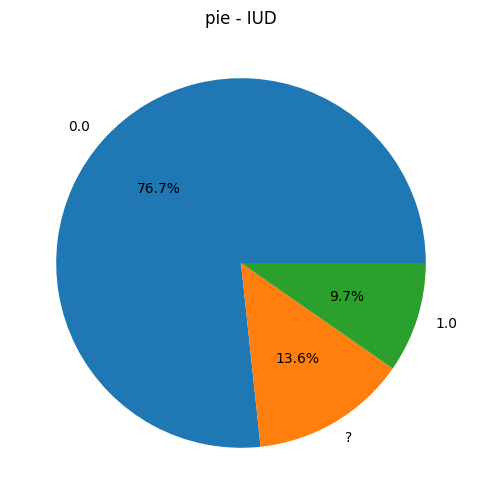

frecuencia - IUD:
     count
IUD       
0.0    658
?      117
1.0     83




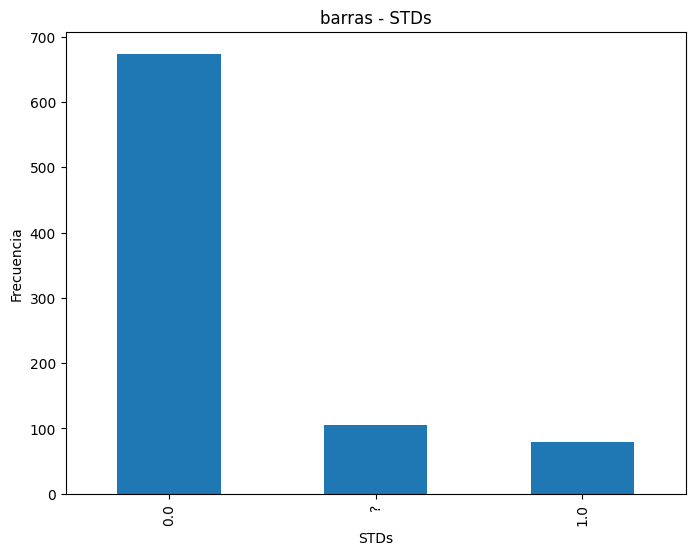

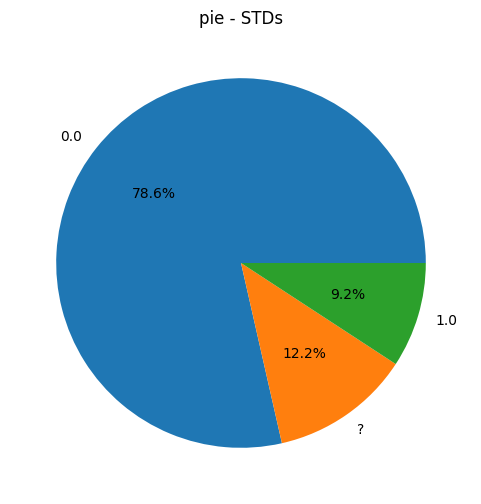

frecuencia - STDs:
      count
STDs       
0.0     674
?       105
1.0      79




In [55]:

categorical_vars = ["First sexual intercourse","Smokes","Hormonal Contraceptives","IUD","STDs","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV"]


for column in categorical_vars[:5]:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f"barras - {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

    plt.figure(figsize=(6, 6))
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f"pie - {column}")
    plt.ylabel('')
    plt.show()

    tabla_frecuencia = df[column].value_counts().to_frame()
    print(f"frecuencia - {column}:")
    print(tabla_frecuencia)
    print("\n")

# 6.
Es importante eliminar los valores faltantes, ya que pueden generar ruido en los análisis. Por lo tanto, identificaremos las columnas con valores faltantes y procederemos a limpiarlas. Además, eliminaremos las columnas que no aportan significativamente al análisis debido a la cantidad insuficiente de datos disponibles, lo que hace imposible su reconstrucción.

In [ ]:
isnull = df.isnull().sum()
print(isnull)

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)       108
IUD                                     0
IUD (years)                           117
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                  

In [ ]:
# Eliminamos las columnas con muchos datos faltantes
drop = ['STDs: Time since first diagnosis', 
        'STDs: Time since last diagnosis',
        'IUD (years)',
        'Hormonal Contraceptives (years)'
        ]
data_cleaned = df.drop(columns=drop)

In [58]:
isnull = df.isnull().sum()
print(isnull)

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)       108
IUD                                     0
IUD (years)                           117
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                  

# 7. Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?
Se tomo la decision de no aplicar directamente el PCA, debido a que las variables categoricas, podrias resultar en no ser optimas, por el aumento dimesional que este implica. 
Esto tomando en cuenta las siguientes consideracion que se han realizado.
- Primero que las variables categorias que tenemos carias, necessitariamos transformarlas en variables numericas
- Tambien para combertir las variables vategorias en variables numericas, estariamos aumentando en gran medida la dimesion de los datos
- Ya tenemos una gran densidad de datos, por lo que aplicar el PCA aqui, podria resultar en un gran problema con respecto a las dimesiones de nuestros datos.
- Ademas que poseemos muchos valores faltantes

# 8. Estudie si es conveniente hacer un Análisis de Componentes Principales. Recuerde que puede usar el índice KMO y el test de esfericidad de Bartlett. Haga un análisis de componentes principales con las variables numéricas, discuta los resultados e interprete los componentes.

In [59]:
dataframe_numeric = df.select_dtypes(include=[np.number])
print(dataframe_numeric)

     Age  Smokes (years)  Smokes (packs/year)  \
0     18             0.0                  0.0   
1     15             0.0                  0.0   
2     34             0.0                  0.0   
3     52            37.0                 37.0   
4     46             0.0                  0.0   
..   ...             ...                  ...   
853   34             0.0                  0.0   
854   32             0.0                  0.0   
855   25             0.0                  0.0   
856   33             0.0                  0.0   
857   29             0.0                  0.0   

     Hormonal Contraceptives (years)  IUD (years)  STDs: Number of diagnosis  \
0                               0.00          0.0                          0   
1                               0.00          0.0                          0   
2                               0.00          0.0                          0   
3                               3.00          0.0                          0   
4          

In [60]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Supongamos que tienes un DataFrame llamado 'dataframe_numeric' que contiene solo las variables numéricas
kmo_all, kmo_model = calculate_kmo(dataframe_numeric)
print("KMO global:", kmo_model)

c:\Users\josem\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


LinAlgError: SVD did not converge

#### 9. Obtenga reglas de asociación interesantes del dataset. Recuerde discretizar las variables numéricas. Genere reglas con diferentes niveles de confianza y soporte. Discuta los resultados. Si considera que debe eliminar variables porque son muy frecuentes y con eso puede recibir más insigths de la generación de reglas. Hágalo y discútalo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from mlxtend.preprocessing import minmax_scaling
from mlxtend.frequent_patterns import apriori, association_rules

# Supongamos que 'dataframe' contiene tus datos con variables numéricas y categóricas

# Paso 1: Imputar valores faltantes en variables numéricas con la media
numeric_columns = dataframe.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
dataframe[numeric_columns] = imputer.fit_transform(dataframe[numeric_columns])

# Paso 2: Discretización por ancho de bin (Equal-Width Binning)
for column in numeric_columns:
    dataframe[column] = pd.cut(dataframe[column], bins=5, labels=False)

# Paso 3: Aplicar One-Hot Encoding a las variables categóricas (si es necesario)
dataframe = pd.get_dummies(dataframe)

# Paso 4: Reemplazar posibles valores NaN generados por One-Hot Encoding con 0
dataframe = dataframe.fillna(0)

# Generar conjuntos de items frecuentes usando el algoritmo Apriori
frequent_itemsets = apriori(dataframe, min_support=0.1, use_colnames=True)

# Generar reglas de asociación a partir de los conjuntos de items frecuentes
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Filtrar las reglas para obtener resultados interesantes con diferentes niveles de confianza y soporte
rules_high_confidence = rules[rules["confidence"] >= 0.7]
rules_high_support = rules[rules["support"] >= 0.1]

# Imprimir los resultados
print("Reglas de alta confianza:")
print(rules_high_confidence)

print("\nReglas de alto soporte:")
print(rules_high_support)
